In [5]:
#1. Importación de Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix


In [6]:
# 2. Carga y Preparación de Datos

# Cargar los datos
df = pd.read_csv('credit_score_data.csv')

# Mostrar las primeras filas para entender la estructura
print("Primeras 5 filas del dataset:")
display(df.head())

# Información básica del dataset
print("\nInformación del dataset:")
display(df.info())

Primeras 5 filas del dataset:


,client_id,age,sex,zone,education,civil_status,children,work_disability,monthly_txs,main_os,...,monthly_outcome,cc_limit,cc_debt,savings_amount,checking_balance,late_payments_last_year,fixed_investment_amount,cash_installment_debt,visa_installment_debt,default_in_next_12_months
0,67388007,33,hombre,2,universidad,soltero,3,no,17,android,...,16748,24619,8414,117713,32621,0,90676,5155,10924,0
1,12550414,21,mujer,9,colegio,soltero,0,no,17,android,...,23766,52583,11252,107455,42529,1,8292,1701,12652,0
2,35965065,27,mujer,13,universidad,soltero,2,no,5,android,...,24277,60781,19782,123253,30244,2,219788,19646,21205,0
3,11598907,45,mujer,6,universidad,casado,3,no,22,ios,...,33020,29361,14243,129994,23370,0,44210,7380,7588,0
4,79587204,45,hombre,2,postgrado,casado,1,no,21,ios,...,23523,53960,12679,240797,35270,0,78286,7308,19002,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   client_id                  200000 non-null  int64  
 1   age                        200000 non-null  int64  
 2   sex                        200000 non-null  object 
 3   zone                       200000 non-null  int64  
 4   education                  200000 non-null  object 
 5   civil_status               200000 non-null  object 
 6   children                   200000 non-null  int64  
 7   work_disability            200000 non-null  object 
 8   monthly_txs                200000 non-null  int64  
 9   main_os                    200000 non-null  object 
 10  devices                    200000 non-null  int64  
 11  daily_balance_checks       200000 non-null  int64  
 12  account_quantity           200000 non-null  int64  
 13  cc_

None

In [7]:
# 3. Manejo de Valores Nulos

# Verificar valores nulos
null_counts = df.isnull().sum()
print("\nCantidad de valores nulos por columna:")
display(null_counts)

# Explicación del manejo de valores nulos
print("""
EXPLICACIÓN: Identificamos las columnas con valores nulos. 
- Para las columnas numéricas, reemplazamos los valores nulos con la mediana, que es más robusta a outliers.
- Para las columnas categóricas, reemplazamos con la moda (valor más frecuente).
Esta estrategia nos permite mantener todos los registros sin eliminar filas.
""")

# Manejar valores nulos si existen
if null_counts.sum() > 0:
    # Para columnas numéricas, reemplazar con la mediana
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if null_counts[col] > 0:
            df[col].fillna(df[col].median(), inplace=True)
    
    # Para columnas categóricas, reemplazar con la moda
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if null_counts[col] > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)


Cantidad de valores nulos por columna:


client_id                    0
age                          0
sex                          0
zone                         0
education                    0
civil_status                 0
children                     0
work_disability              0
monthly_txs                  0
main_os                      0
devices                      0
daily_balance_checks         0
account_quantity             0
cc_quantity                  0
cc_limit_usage_avg           0
monthly_income               0
monthly_outcome              0
cc_limit                     0
cc_debt                      0
savings_amount               0
checking_balance             0
late_payments_last_year      0
fixed_investment_amount      0
cash_installment_debt        0
visa_installment_debt        0
default_in_next_12_months    0
dtype: int64


EXPLICACIÓN: Identificamos las columnas con valores nulos. 
- Para las columnas numéricas, reemplazamos los valores nulos con la mediana, que es más robusta a outliers.
- Para las columnas categóricas, reemplazamos con la moda (valor más frecuente).
Esta estrategia nos permite mantener todos los registros sin eliminar filas.



In [8]:
# 4. Análisis Exploratorio de Datos

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Distribución de la variable objetivo
target_col = 'default_in_next_12_months'
print(f"\nDistribución de la variable objetivo '{target_col}':")
target_counts = df[target_col].value_counts()
display(target_counts)
default_rate = df[target_col].mean()
print(f"Tasa de default: {default_rate:.2%}")

print("""
EXPLICACIÓN: Mostramos la distribución de la variable objetivo 'default_in_next_12_months'. 
La tasa de default indica qué porcentaje de clientes entrarán en default en los próximos 12 meses.
Este valor es crucial para entender el desbalance de clases en nuestro problema, lo que puede
afectar la selección de métricas y estrategias de modelado.
""")



Estadísticas descriptivas:


,client_id,age,zone,children,monthly_txs,devices,daily_balance_checks,account_quantity,cc_quantity,cc_limit_usage_avg,...,monthly_outcome,cc_limit,cc_debt,savings_amount,checking_balance,late_payments_last_year,fixed_investment_amount,cash_installment_debt,visa_installment_debt,default_in_next_12_months
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,5.495144e+07,36.460860,9.494350,2.001500,14.999980,1.998980,5.493045,2.001945,1.50126,0.498937,...,21048.827080,43070.066905,21733.166390,116031.083155,23370.992045,0.850445,127930.802955,8512.173975,11783.541410,0.200000
std,2.595691e+07,10.962335,5.192185,1.414531,6.050569,0.814827,2.870128,0.817083,0.50000,0.291467,...,9001.546614,21167.244938,20095.625035,74445.981471,14166.551769,0.907801,95680.213661,7391.971703,7334.726519,0.400001
min,1.000037e+07,18.000000,1.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.00000,0.000000,...,1000.000000,2000.000000,2000.000000,1007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.256290e+07,27.000000,5.000000,1.000000,10.000000,1.000000,3.000000,1.000000,1.00000,0.250000,...,15461.000000,25707.750000,8294.000000,43428.750000,11198.000000,0.000000,35077.000000,3257.000000,5701.000000,0.000000
50%,5.490616e+07,36.000000,9.000000,2.000000,15.000000,2.000000,5.000000,2.000000,2.00000,0.500000,...,21956.000000,42586.000000,14429.000000,112374.000000,21990.500000,1.000000,123897.000000,6523.000000,11373.500000,0.000000
75%,7.736066e+07,46.000000,14.000000,3.000000,20.000000,3.000000,8.000000,3.000000,2.00000,0.750000,...,28486.000000,61322.000000,25274.000000,181062.000000,35420.000000,1.000000,211840.250000,9786.000000,17035.000000,0.000000
max,9.999965e+07,55.000000,18.000000,4.000000,25.000000,3.000000,10.000000,3.000000,2.00000,1.000000,...,35000.000000,80000.000000,79999.000000,250000.000000,50000.000000,3.000000,300000.000000,30000.000000,30000.000000,1.000000



Distribución de la variable objetivo 'default_in_next_12_months':


default_in_next_12_months
0    160000
1     40000
Name: count, dtype: int64

Tasa de default: 20.00%

EXPLICACIÓN: Mostramos la distribución de la variable objetivo 'default_in_next_12_months'. 
La tasa de default indica qué porcentaje de clientes entrarán en default en los próximos 12 meses.
Este valor es crucial para entender el desbalance de clases en nuestro problema, lo que puede
afectar la selección de métricas y estrategias de modelado.



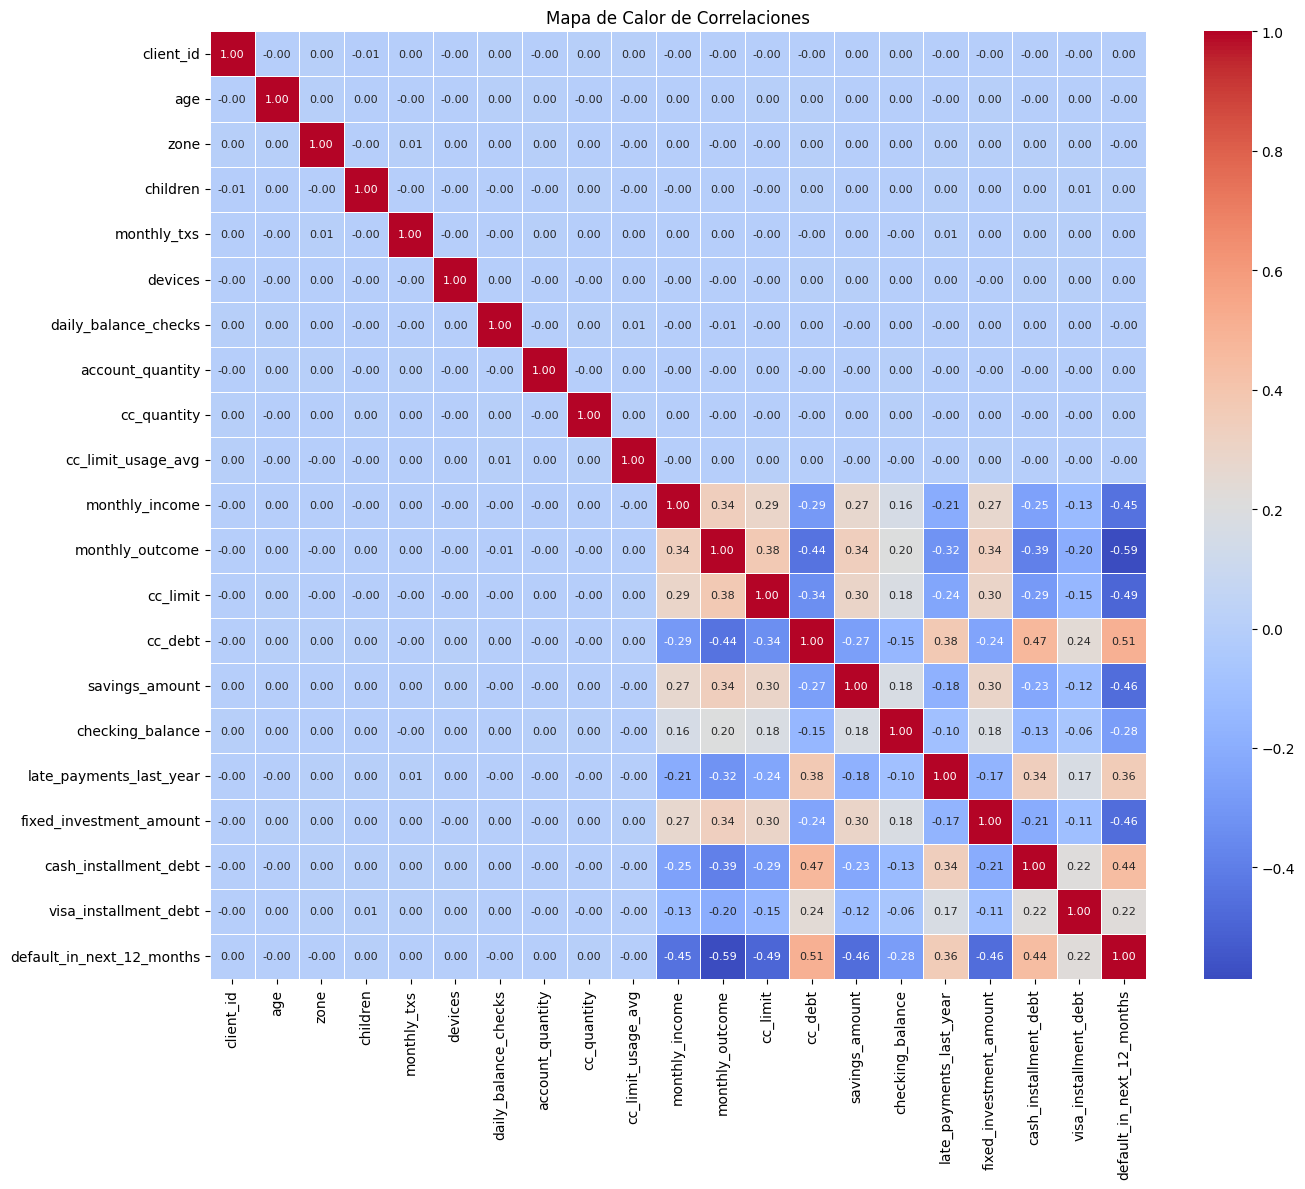


EXPLICACIÓN: El mapa de calor muestra las correlaciones entre variables numéricas.
- Valores cercanos a 1 indican una fuerte correlación positiva (cuando una variable aumenta, la otra también).
- Valores cercanos a -1 indican una fuerte correlación negativa (cuando una variable aumenta, la otra disminuye).
- Valores cercanos a 0 indican poca o ninguna correlación.

Este mapa nos ayuda a:
1. Identificar variables altamente correlacionadas entre sí, lo que podría indicar multicolinealidad.
2. Detectar qué variables tienen mayor relación con nuestra variable objetivo.
3. Seleccionar variables más informativas para nuestro modelo.



In [9]:
# 5. Mapa de Calor de Correlaciones

# Crear mapa de calor de correlaciones
plt.figure(figsize=(14, 12))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 8})
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()

print("""
EXPLICACIÓN: El mapa de calor muestra las correlaciones entre variables numéricas.
- Valores cercanos a 1 indican una fuerte correlación positiva (cuando una variable aumenta, la otra también).
- Valores cercanos a -1 indican una fuerte correlación negativa (cuando una variable aumenta, la otra disminuye).
- Valores cercanos a 0 indican poca o ninguna correlación.

Este mapa nos ayuda a:
1. Identificar variables altamente correlacionadas entre sí, lo que podría indicar multicolinealidad.
2. Detectar qué variables tienen mayor relación con nuestra variable objetivo.
3. Seleccionar variables más informativas para nuestro modelo.
""")

In [10]:
# 6. Preparación de Datos para el Modelado

# Separar características y variable objetivo
X = df.drop(columns=[target_col])
y = df[target_col]

# Identificar y codificar variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nVariables categóricas identificadas: {list(categorical_cols)}")

# Convertir a variables dummy
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(f"\nDimensiones después de codificación one-hot: {X.shape}")

print("""
EXPLICACIÓN: Convertimos las variables categóricas a variables dummy (codificación one-hot).
La opción 'drop_first=True' elimina una de las categorías para evitar la multicolinealidad perfecta.
El aumento en el número de columnas refleja que cada categoría de cada variable categórica
se ha convertido en una columna binaria independiente.
""")

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nConjunto de entrenamiento: {X_train.shape[0]} registros")
print(f"Conjunto de prueba: {X_test.shape[0]} registros")

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("""
EXPLICACIÓN: Dividimos los datos en conjuntos de entrenamiento (70%) y prueba (30%).
La opción 'stratify=y' asegura que la proporción de defaults sea igual en ambos conjuntos.
Luego escalamos las variables numéricas para que tengan media 0 y desviación estándar 1,
lo que mejora el rendimiento de la regresión logística.
""")


Variables categóricas identificadas: ['sex', 'education', 'civil_status', 'work_disability', 'main_os']

Dimensiones después de codificación one-hot: (200000, 27)

EXPLICACIÓN: Convertimos las variables categóricas a variables dummy (codificación one-hot).
La opción 'drop_first=True' elimina una de las categorías para evitar la multicolinealidad perfecta.
El aumento en el número de columnas refleja que cada categoría de cada variable categórica
se ha convertido en una columna binaria independiente.


Conjunto de entrenamiento: 140000 registros
Conjunto de prueba: 60000 registros

EXPLICACIÓN: Dividimos los datos en conjuntos de entrenamiento (70%) y prueba (30%).
La opción 'stratify=y' asegura que la proporción de defaults sea igual en ambos conjuntos.
Luego escalamos las variables numéricas para que tengan media 0 y desviación estándar 1,
lo que mejora el rendimiento de la regresión logística.



In [11]:
# 7. Implementación del Modelo de Regresión Logística

# Implementar regresión logística baseline
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de clase positiva
y_pred = model.predict(X_test_scaled)  # Predicciones binarias con umbral 0.5

print("""
EXPLICACIÓN: Entrenamos un modelo de regresión logística con un máximo de 1000 iteraciones.
Obtenemos dos tipos de predicciones:
1. y_pred_proba: Probabilidades de que cada cliente entre en default (entre 0 y 1)
2. y_pred: Predicciones binarias (0 o 1) utilizando un umbral de 0.5
""")



EXPLICACIÓN: Entrenamos un modelo de regresión logística con un máximo de 1000 iteraciones.
Obtenemos dos tipos de predicciones:
1. y_pred_proba: Probabilidades de que cada cliente entre en default (entre 0 y 1)
2. y_pred: Predicciones binarias (0 o 1) utilizando un umbral de 0.5



In [12]:
# 8. Evaluación del Modelo

# Mostrar informe de clasificación
print("\nInforme de clasificación:")
clf_report = classification_report(y_test, y_pred)
print(clf_report)

print("""
EXPLICACIÓN: El informe de clasificación muestra varias métricas:
- Precision: Proporción de predicciones positivas correctas entre todas las predicciones positivas
- Recall: Proporción de positivos reales que fueron correctamente identificados
- F1-score: Media armónica de precision y recall
- Support: Número de ocurrencias de cada clase

Estas métricas nos ayudan a entender cómo se comporta nuestro modelo para cada clase.
""")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

print("""
EXPLICACIÓN: La matriz de confusión muestra:
- Verdaderos Negativos (arriba izquierda): Clientes correctamente clasificados como no default
- Falsos Positivos (arriba derecha): Clientes incorrectamente clasificados como default
- Falsos Negativos (abajo izquierda): Clientes en default incorrectamente clasificados como no default
- Verdaderos Positivos (abajo derecha): Clientes en default correctamente clasificados

En un modelo de credit scoring, los falsos negativos son especialmente costosos,
pues representan préstamos que serán otorgados pero que resultarán en default.
""")

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC: {auc:.4f}")

print("""
EXPLICACIÓN: El AUC (Area Under the ROC Curve) es una métrica que mide la capacidad del modelo
para distinguir entre las clases. Un valor de 0.5 indica un modelo sin capacidad discriminativa
(equivalente a un modelo aleatorio), mientras que un valor de 1.0 indica discriminación perfecta.
En modelos de credit scoring, se buscan valores de AUC superiores a 0.7,
siendo excelentes los modelos con AUC > 0.8.
""")


Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     48000
           1       0.88      0.80      0.84     12000

    accuracy                           0.94     60000
   macro avg       0.91      0.89      0.90     60000
weighted avg       0.94      0.94      0.94     60000


EXPLICACIÓN: El informe de clasificación muestra varias métricas:
- Precision: Proporción de predicciones positivas correctas entre todas las predicciones positivas
- Recall: Proporción de positivos reales que fueron correctamente identificados
- F1-score: Media armónica de precision y recall
- Support: Número de ocurrencias de cada clase

Estas métricas nos ayudan a entender cómo se comporta nuestro modelo para cada clase.


Matriz de confusión:
[[46631  1369]
 [ 2354  9646]]

EXPLICACIÓN: La matriz de confusión muestra:
- Verdaderos Negativos (arriba izquierda): Clientes correctamente clasificados como no default
- Falsos Positivos (ar

In [13]:
# 9. Cálculo del Estadístico KS (Kolmogorov-Smirnov)

# Calcular la curva ROC y el estadístico KS
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ks_statistic = max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
print(f"\nEstadístico KS: {ks_statistic:.4f} en umbral: {ks_threshold:.4f}")

print("""
EXPLICACIÓN: El estadístico KS (Kolmogorov-Smirnov) mide la máxima diferencia entre
las distribuciones acumuladas de scores para clientes buenos y malos.
- Un KS más alto indica mejor separación entre buenos y malos clientes
- En la industria de credit scoring, un KS > 0.4 se considera bueno
- El umbral asociado al KS máximo puede usarse como punto de corte óptimo para clasificación

El KS es una métrica estándar en la industria financiera para evaluar modelos de riesgo crediticio.
""")


Estadístico KS: 0.8072 en umbral: 0.1902

EXPLICACIÓN: El estadístico KS (Kolmogorov-Smirnov) mide la máxima diferencia entre
las distribuciones acumuladas de scores para clientes buenos y malos.
- Un KS más alto indica mejor separación entre buenos y malos clientes
- En la industria de credit scoring, un KS > 0.4 se considera bueno
- El umbral asociado al KS máximo puede usarse como punto de corte óptimo para clasificación

El KS es una métrica estándar en la industria financiera para evaluar modelos de riesgo crediticio.



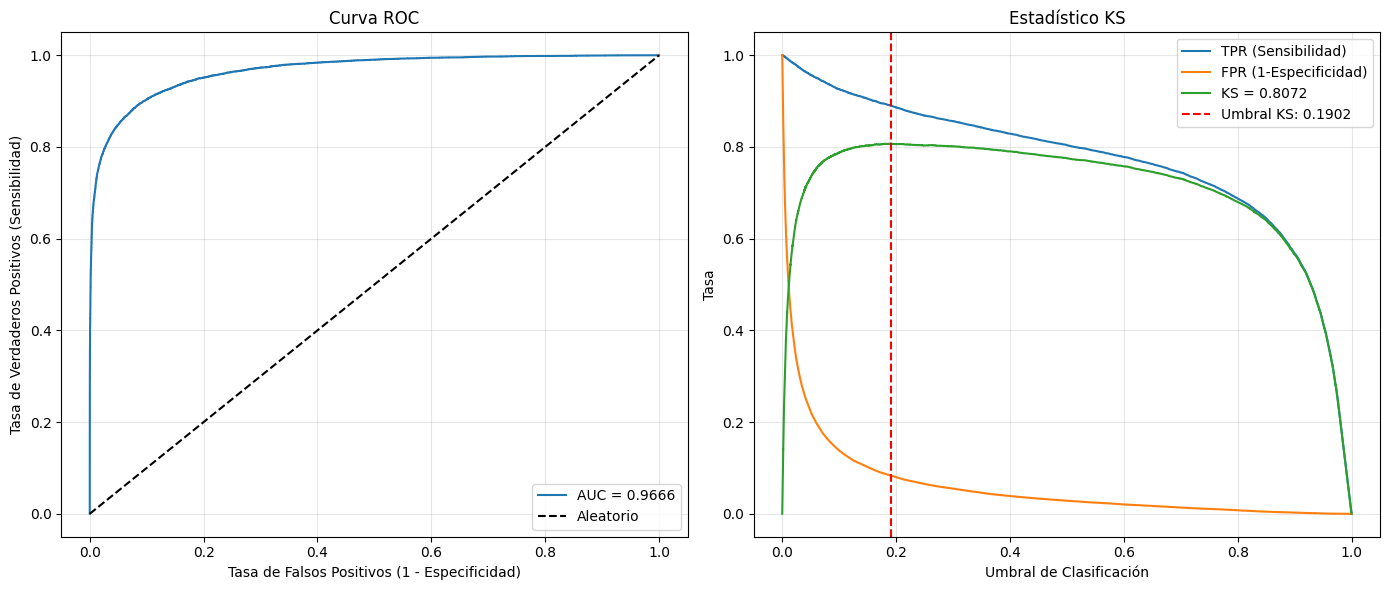


EXPLICACIÓN: 
1. Curva ROC: Muestra la compensación entre la tasa de verdaderos positivos y falsos positivos
   para diferentes umbrales de clasificación. Un modelo perfecto tendría un AUC de 1.0.

2. Gráfico KS: Muestra cómo varían las tasas TPR y FPR con diferentes umbrales, y la diferencia
   entre ambas (KS). El punto donde esta diferencia es máxima determina el umbral óptimo
   según el criterio KS.



In [14]:
# 10. Visualizaciones

# Gráficos de evaluación
plt.figure(figsize=(14, 6))

# Gráfico de la curva ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico del estadístico KS
plt.subplot(1, 2, 2)
plt.plot(thresholds, tpr, label='TPR (Sensibilidad)')
plt.plot(thresholds, fpr, label='FPR (1-Especificidad)')
plt.plot(thresholds, tpr - fpr, label=f'KS = {ks_statistic:.4f}')
plt.axvline(x=ks_threshold, color='r', linestyle='--', label=f'Umbral KS: {ks_threshold:.4f}')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Tasa')
plt.title('Estadístico KS')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("""
EXPLICACIÓN: 
1. Curva ROC: Muestra la compensación entre la tasa de verdaderos positivos y falsos positivos
   para diferentes umbrales de clasificación. Un modelo perfecto tendría un AUC de 1.0.

2. Gráfico KS: Muestra cómo varían las tasas TPR y FPR con diferentes umbrales, y la diferencia
   entre ambas (KS). El punto donde esta diferencia es máxima determina el umbral óptimo
   según el criterio KS.
""")

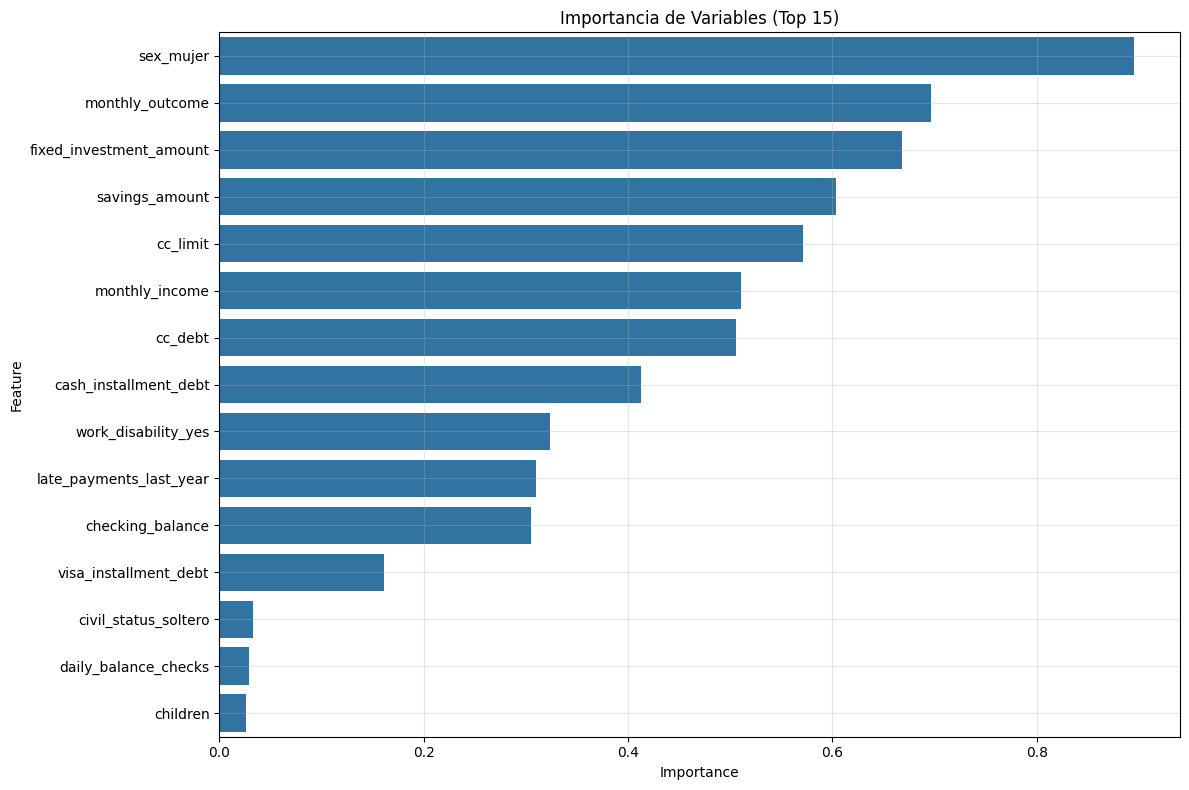


Variables más importantes:


,Feature,Importance
20,sex_mujer,0.895544
11,monthly_outcome,0.696731
17,fixed_investment_amount,0.668467
14,savings_amount,0.603610
12,cc_limit,0.571132
10,monthly_income,0.510277
13,cc_debt,0.505943
18,cash_installment_debt,0.412404
25,work_disability_yes,0.323606
16,late_payments_last_year,0.310314



EXPLICACIÓN: Este gráfico muestra las variables más influyentes en el modelo de
regresión logística, basadas en el valor absoluto de sus coeficientes.
- Variables con mayor importancia tienen mayor impacto en la predicción de default
- Conocer estas variables puede ayudar a entender los factores de riesgo más relevantes
- También es útil para simplificar el modelo si fuera necesario, manteniendo solo
  las variables más importantes

Esta información es valiosa para la interpretación del negocio y para comunicar
los resultados a stakeholders no técnicos.



In [15]:
# 11. Análisis de Importancia de Variables

# Análisis de importancia de variables
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Importancia de Variables (Top 15)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nVariables más importantes:")
display(feature_importance.head(15))

print("""
EXPLICACIÓN: Este gráfico muestra las variables más influyentes en el modelo de
regresión logística, basadas en el valor absoluto de sus coeficientes.
- Variables con mayor importancia tienen mayor impacto en la predicción de default
- Conocer estas variables puede ayudar a entender los factores de riesgo más relevantes
- También es útil para simplificar el modelo si fuera necesario, manteniendo solo
  las variables más importantes

Esta información es valiosa para la interpretación del negocio y para comunicar
los resultados a stakeholders no técnicos.
""")

In [18]:
# 12. Conclusiones

print("""
CONCLUSIONES:

1. Se ha implementado exitosamente un modelo baseline de regresión logística para predecir
   la probabilidad de default en los próximos 12 meses.

2. El modelo ha sido evaluado mediante métricas estándar de la industria:
   - AUC: {:.4f}
   - Estadístico KS: {:.4f} (en umbral: {:.4f})

3. Se han identificado las variables más importantes que influyen en la predicción de default.
""".format(auc, ks_statistic, ks_threshold))


CONCLUSIONES:

1. Se ha implementado exitosamente un modelo baseline de regresión logística para predecir
   la probabilidad de default en los próximos 12 meses.

2. El modelo ha sido evaluado mediante métricas estándar de la industria:
   - AUC: 0.9666
   - Estadístico KS: 0.8072 (en umbral: 0.1902)

3. Se han identificado las variables más importantes que influyen en la predicción de default.

